In [3]:
# Librerias
import os
from skimage import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

# DATASET

El presente notebook es para preparar y describir el dataset para el proyecto de grado, el dataset final llevara por nombre OVERLAECOBO, pero el mismo llevará un proceso desde que se extrae las imagenes de SASplanet hasta obtener test y train, incluso obtener las matrices target. Se plantea que el dataset este etiquetado en 7 clases, donde cada pixel tendra su propia clase, esto con el fin de aplicar `Segmentacion Semantica`. Las clases serán valores de 0 a 6, donde el 0 es **no definido** y los valores de 1 a 6 represetnan cada estrato. El dataset contará con varios niveles de zoom y cada uno estara divido en train y test.

## 1. Dataset *From_SAS*

Se obtendran imagenes satelitales de varios niveles de Zoom, desde el 13 al 20, se sacaran las imagenes layer y tambien una serie de imagenes guia para poder dividir las imagenes entre train y test, y para eliminar las imagenes externas a bogota, dado que estas implciarian una mayor cantidad de informacion para la clase **no definido**.

### 1.1 SASplanet
El Daset se creo usando:
* Archivos [KMLs](https://drive.google.com/open?id=15VnvN6ZRTbsqqd9kl3ukNWBj3oqADsy0), en especifico el de los estratos, la guia para dividir en train y uno indicando que imagnes eliminar.

* El programa libre [SASplanet](https://bitbucket.org/sas_team/sas.planet.bin/downloads/) para descargar las imagenes. 

Un pequeño tutotial de [SASplanet](https://www.youtube.com/watch?v=g05X5M8ucTI)

### 1.2 Contenido:
El dataset esta alojado en [Drive]() y tiene la siguiente estructura y contenido:



In [15]:
os.listdir('./data/dataset/from_SAS/')

['.gitignore', 'economic_layer', 'satellite', 'to_erase', 'train&test']

* **satellite:** Imagenes satelitales de bogota en distintos niveles de zoom

<div style="display:bolck; align:0 auto;">
<img src="./img/satellite_13.jpg" style="width:15%">
</div>


In [18]:
satellite = os.listdir('./data/dataset/from_SAS/satellite')
print("Cantidad de imagenes: ",len(satellite))

Cantidad de imagenes:  1368


* **train&test:** Imagenes que indican la pertenencia de las imagenes de la carpeta satelite a train (Azul) o test (Rojo).

<div style="display:bolck; align:0 auto;">
<img src="./img/train&test_13.jpg" style="width:15%">
</div>

In [20]:
train_test = os.listdir('./data/dataset/from_SAS/train&test')
print("Cantidad de imagenes: ",len(train_test))

Cantidad de imagenes:  1368


* **to_erase:** Imagenes que indican cuales son las imagenes satelitales que se deben eliminar para no dar mucha importancia a la clase **no definido**. la correspondiente imagen satelital a la imagen negra es la que deberia ser eliminada

<div style="display:bolck; align:0 auto;">
<img src="./img/to_erase_13.jpg" style="width:15%">
</div>

In [22]:
to_erase = os.listdir('./data/dataset/from_SAS/to_erase')
print("Cantidad de imagenes: ",len(to_erase))

Cantidad de imagenes:  1368


* **economic_layer:** Imagenes con la informacion de los estratos correspondientes a las iamgenes satelitales.

<div style="display:bolck; align:0 auto;">
<img src="./img/economic_layer_13.jpg" style="width:15%">
</div>

In [23]:
economic_layer = os.listdir('./data/dataset/from_SAS/economic_layer')
print("Cantidad de imagenes: ",len(economic_layer))

Cantidad de imagenes:  1368


### 1.3 to_erase:
como se menciono, las imagenes correspondientes a las imagenes en negro de la carpeta `to_erase` se deben eliminar.

In [4]:
l_17 = ["17_1-1", "17_4-4"]
l_18 = ["18_1-1", "18_1-2", "18_1-3", "18_1-7", "18_1-8", "18_2-1", "18_2-2", "18_2-8", "18_3-1", "18_4-1", "18_5-1", "18_7-7", "18_7-8", "18_8-5", "18_8-6", "18_8-7", "18_8-8"]
l_19 = ["19_1-1", "19_1-2", "19_1-3", "19_1-4", "19_1-5", "19_1-6", "19_1-7", "19_1-8", "19_1-11", "19_1-12", "19_1-13", "19_1-14", "19_1-15", "19_1-16", "19_2-1", "19_2-2", "19_2-3", "19_2-4", "19_2-5", "19_2-6", "19_2-7", "19_2-12", "19_2-13", "19_2-14", "19_2-15", "19_2-16", "19_3-1", "19_3-2", "19_3-3", "19_3-4", "19_3-5", "19_3-6", "19_3-12", "19_3-13", "19_3-14", "19_3-15", "19_3-16", "19_4-1", "19_4-2", "19_4-3", "19_4-4", "19_4-5", "19_4-14", "19_4-15", "19_4-16", "19_5-1", "19_5-2", "19_5-3", "19_5-4", "19_5-15", "19_5-16", "19_6-1", "19_6-2", "19_6-3", "19_6-16", "19_7-1", "19_7-2", "19_7-3", "19_8-1", "19_8-2", "19_9-1", "19_9-2","19_10-1", "19_10-2", "19_11-1", "19_11-2", "19_12-14", "19_12-15", "19_12-16", "19_13-12", "19_13-13", "19_13-14", "19_13-15", "19_13-16", "19_14-10", "19_14-11", "19_14-12", "19_14-13", "19_14-14", "19_14-15", "19_14-16", "19_15-9", "19_15-10", "19_15-11", "19_15-12", "19_15-13", "19_15-14", "19_15-15", "19_15-16", "19_16-9", "19_16-10", "19_16-11", "19_16-12", "19_16-13", "19_16-14", "19_16-15", "19_16-16"]
#l_20 = ["20_1-1" ,"20_1-2" ,"20_1-3" ,"20_1-4" ,"20_1-5" ,"20_1-6" ,"20_1-7" ,"20_1-8" ,"20_1-9" ,"20_1-10" ,"20_1-11" ,"20_1-12" ,"20_1-13" ,"20_1-14" ,"20_1-15" ,"20_1-16" ,"20_1-21" ,"20_1-22" ,"20_1-23" ,"20_1-24" ,"20_1-25" ,"20_1-26" ,"20_1-27" ,"20_1-28" ,"20_1-29" ,"20_1-30" ,"20_1-31" ,"20_1-32" ,"20_2-1" ,"20_2-2" ,"20_2-3" ,"20_2-4" ,"20_2-5" ,"20_2-6" ,"20_2-7" ,"20_2-8" ,"20_2-9" ,"20_2-10" ,"20_2-11" ,"20_2-12" ,"20_2-13" ,"20_2-14" ,"20_2-15" ,"20_2-22" ,"20_2-23" ,"20_2-24" ,"20_2-25" ,"20_2-26" ,"20_2-27" ,"20_2-28" ,"20_2-29" ,"20_2-30" ,"20_2-31" ,"20_2-32" ,"20_3-1" ,"20_3-2" ,"20_3-3" ,"20_3-4" ,"20_3-5" ,"20_3-6" ,"20_3-7" ,"20_3-8" ,"20_3-9" ,"20_3-10" ,"20_3-11" ,"20_3-12" ,"20_3-13" ,"20_3-14" ,"20_3-15" ,"20_3-22" ,"20_3-23" ,"20_3-24" ,"20_3-25" ,"20_3-26" ,"20_3-27" ,"20_3-28" ,"20_3-29" ,"20_3-30" ,"20_3-31" ,"20_3-32" ,"20_4-1" ,"20_4-2" ,"20_4-3" ,"20_4-4" ,"20_4-5" ,"20_4-6" ,"20_4-7" ,"20_4-8" ,"20_4-9" ,"20_4-10" ,"20_4-11" ,"20_4-12" ,"20_4-13" ,"20_4-14" ,"20_4-15" ,"20_4-22" ,"20_4-23" ,"20_4-24" ,"20_4-25" ,"20_4-26" ,"20_4-27" ,"20_4-28" ,"20_4-29" ,"20_4-30" ,"20_4-31" ,"20_4-32" ,"20_5-1" ,"20_5-2" ,"20_5-3" ,"20_5-4" ,"20_5-5" ,"20_5-6" ,"20_5-7" ,"20_5-8" ,"20_5-9" ,"20_5-10" ,"20_5-11" ,"20_5-12" ,"20_5-13" ,"20_5-14" ,"20_5-15" ,"20_5-22" ,"20_5-23" ,"20_5-24" ,"20_5-25" ,"20_5-26" ,"20_5-27" ,"20_5-28" ,"20_5-29" ,"20_5-30" ,"20_5-31" ,"20_5-32" ,"20_6-1" ,"20_6-2" ,"20_6-3" ,"20_6-4" ,"20_6-5" ,"20_6-6" ,"20_6-7" ,"20_6-8" ,"20_6-9" ,"20_6-10" ,"20_6-11" ,"20_6-12" ,"20_6-14" ,"20_6-24" ,"20_6-25" ,"20_6-26" ,"20_6-27" ,"20_6-28" ,"20_6-29" ,"20_6-30" ,"20_6-31" ,"20_6-32" ,"20_7-1" ,"20_7-2" ,"20_7-3" ,"20_7-4" ,"20_7-5" ,"20_7-6" ,"20_7-7" ,"20_7-8" ,"20_7-9" ,"20_7-10" ,"20_7-11" ,"20_7-27" ,"20_7-28" ,"20_7-29" ,"20_7-30" ,"20_7-31" ,"20_7-32" ,"20_8-1" ,"20_8-2" ,"20_8-3" ,"20_8-4" ,"20_8-5" ,"20_8-6" ,"20_8-7" ,"20_8-8" ,"20_8-9" ,"20_8-10" ,"20_8-27" ,"20_8-28" ,"20_8-29" ,"20_8-30" ,"20_8-31" ,"20_8-32" ,"20_9-1" ,"20_9-2" ,"20_9-3" ,"20_9-4" ,"20_9-5" ,"20_9-6" ,"20_9-7" ,"20_9-8" ,"20_9-9" ,"20_9-27" ,"20_9-28" ,"20_9-29" ,"20_9-30" ,"20_9-31" ,"20_9-32" ,"20_10-1" ,"20_10-2" ,"20_10-3" ,"20_10-4" ,"20_10-5" ,"20_10-6" ,"20_10-7" ,"20_10-8" ,"20_10-9" ,"20_10-29" ,"20_10-30" ,"20_10-31" ,"20_10-32" ,"20_11-1" ,"20_11-2" ,"20_11-3" ,"20_11-4" ,"20_11-5" ,"20_11-6" ,"20_11-7" ,"20_11-8" ,"20_11-30" ,"20_11-31" ,"20_11-32" ,"20_12-1" ,"20_12-2" ,"20_12-3" ,"20_12-4" ,"20_12-5" ,"20_12-6" ,"20_12-7" ,"20_12-30" ,"20_12-31" ,"20_12-32" ,"20_13-1" ,"20_13-2" ,"20_13-3" ,"20_13-4" ,"20_13-5" ,"20_13-6" ,"20_13-30" ,"20_13-31" ,"20_13-32" ,"20_14-1" ,"20_14-2" ,"20_14-3" ,"20_14-4" ,"20_14-5" ,"20_14-6" ,"20_14-30" ,"20_15-1" ,"20_15-2" ,"20_15-3" ,"20_15-4" ,"20_15-5" ,"20_16-1" ,"20_16-2" ,"20_16-3" ,"20_16-4" ,"20_16-5" ,"20_17-1" ,"20_17-2" ,"20_17-3" ,"20_17-4" ,"20_17-5" ,"20_17-32" ,"20_18-1" ,"20_18-2" ,"20_18-3" ,"20_18-4" ,"20_18-5" ,"20_18-32" ,"20_19-1" ,"20_19-2" ,"20_19-3" ,"20_19-4" ,"20_19-5" ,"20_19-32" ,"20_20-1" ,"20_20-2" ,"20_20-3" ,"20_20-4" ,"20_20-5" ,"20_21-1" ,"20_21-2" ,"20_21-3" ,"20_21-4" ,"20_21-5" ,"20_22-1" ,"20_22-2" ,"20_22-3" ,"20_22-4" ,"20_22-5" ,"20_22-28" ,"20_22-31" ,"20_23-2" ,"20_23-3" ,"20_23-4" ,"20_23-26" ,"20_23-27" ,"20_23-28" ,"20_23-29" ,"20_23-30" ,"20_23-31" ,"20_23-32" ,"20_24-25" ,"20_24-26" ,"20_24-27" ,"20_24-28" ,"20_24-29" ,"20_24-30" ,"20_24-31" ,"20_24-32" ,"20_25-22" ,"20_25-23" ,"20_25-24" ,"20_25-25" ,"20_25-26" ,"20_25-27" ,"20_25-28" ,"20_25-29" ,"20_25-30" ,"20_25-31" ,"20_25-32" ,"20_26-20" ,"20_26-21" ,"20_26-22" ,"20_26-23" ,"20_26-24" ,"20_26-25" ,"20_26-26" ,"20_26-27" ,"20_26-28" ,"20_26-29" ,"20_26-30" ,"20_26-31" ,"20_26-32" ,"20_27-18" ,"20_27-19" ,"20_27-20" ,"20_27-21" ,"20_27-22" ,"20_27-23" ,"20_27-24" ,"20_27-25" ,"20_27-26" ,"20_27-27" ,"20_27-28" ,"20_27-29" ,"20_27-30" ,"20_27-31" ,"20_27-32" ,"20_28-17" ,"20_28-18" ,"20_28-19" ,"20_28-20" ,"20_28-21" ,"20_28-22" ,"20_28-23" ,"20_28-24" ,"20_28-25" ,"20_28-26" ,"20_28-27" ,"20_28-28" ,"20_28-29" ,"20_28-30" ,"20_28-31" ,"20_28-32" ,"20_29-16" ,"20_29-17" ,"20_29-18" ,"20_29-19" ,"20_29-20" ,"20_29-21" ,"20_29-22" ,"20_29-23" ,"20_29-24" ,"20_29-25" ,"20_29-26" ,"20_29-27" ,"20_29-28" ,"20_29-29" ,"20_29-30" ,"20_29-31" ,"20_29-32" ,"20_30-4" ,"20_30-16" ,"20_30-17" ,"20_30-18" ,"20_30-19" ,"20_30-20" ,"20_30-21" ,"20_30-22" ,"20_30-23" ,"20_30-24" ,"20_30-25" ,"20_30-26" ,"20_30-27" ,"20_30-28" ,"20_30-29" ,"20_30-30" ,"20_30-31" ,"20_30-32" ,"20_31-4" ,"20_31-5" ,"20_31-16" ,"20_31-17" ,"20_31-18" ,"20_31-19" ,"20_31-20" ,"20_31-21" ,"20_31-22" ,"20_31-23" ,"20_31-24" ,"20_31-25" ,"20_31-26" ,"20_31-27" ,"20_31-28" ,"20_31-29" ,"20_31-30" ,"20_31-31" ,"20_31-32" ,"20_32-4" ,"20_32-5" ,"20_32-11" ,"20_32-12" ,"20_32-13" ,"20_32-16" ,"20_32-17" ,"20_32-18" ,"20_32-19" ,"20_32-20" ,"20_32-21" ,"20_32-22" ,"20_32-23" ,"20_32-24" ,"20_32-25" ,"20_32-26" ,"20_32-27" ,"20_32-28" ,"20_32-29" ,"20_32-30" ,"20_32-31" ,"20_32-32"]
to_erase = [l_17, l_18, l_19, l_20]

In [9]:
dir_list = os.listdir('./data/dataset/OVERLAECOBO/')
dir_list[6:11]

['OVERLAECOBO_16',
 'OVERLAECOBO_17',
 'OVERLAECOBO_18',
 'OVERLAECOBO_19',
 'OVERLAECOBO_20']

In [5]:
for j in to_erase:
    for k in j:
        #print("./data/dataset/OVERLAECOBO/OVERLAECOBO_"+k[:2]+"/"+k+".jpg")
        os.remove("./data/dataset/OVERLAECOBO/OVERLAECOBO_"+k[:2]+"/mujer/"+k+".jpg")

FileNotFoundError: [WinError 2] El sistema no puede encontrar el archivo especificado: './data/dataset/OVERLAECOBO/OVERLAECOBO_20/mujer/20_1-1.jpg'

Con esto se eliminan las imagenes sobrantes, claro esta que este proceso sera reutilizado nuevamente una vez se hayan subdivido las imagenes.

In [31]:
to_erase = os.listdir('./data/dataset/from_SAS/to_erase')
economic_layer = os.listdir('./data/dataset/from_SAS/economic_layer')
train_test = os.listdir('./data/dataset/from_SAS/train&test')
satellite = os.listdir('./data/dataset/from_SAS/satellite')
print("Nuevo contenido:")
print("Cantidad de imagenes: ",len(satellite))
print("Cantidad de imagenes: ",len(train_test))
print("Cantidad de imagenes: ",len(economic_layer))
print("Cantidad de imagenes: ",len(to_erase))

Nuevo contenido:
Cantidad de imagenes:  806
Cantidad de imagenes:  806
Cantidad de imagenes:  806
Cantidad de imagenes:  806


### 1.4 Extraccion de parches
Dado que en la mayoria de los ejemplos de segmentacion semantica se usan imagenes ed 256x512 o de 256x256, las imagenes del presente dataset tambien se llevaran a estas dimensiones, y por consejo de los profesores fabio y raul, creare dichos parches con un solapamiento entre el 10 y 20 porciento.

![HW](./vector/H_and_W.svg)

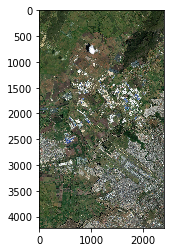

In [35]:
img_to_extract = io.imread("./data/dataset/from_SAS/satellite/16_1-1.jpg")
plt.imshow(img_to_extract)

In [36]:
img_to_extract.shape

(4218, 2418, 3)

In [6]:
def extract_patch(img, patch_w, patch_h, patch_per):
    
    img_h = img.shape[0]
    img_w = img.shape[1]
    patchs = []
    
    
    count_h = 0
    
    nw = int((100*img_w)/(patch_w*(100-patch_per)))
    nh = int((100*img_h)/(patch_h*(100-patch_per)))
     
    init_patch_h = 0
    end_patch_h = patch_h
    
    for i in range(nh):
        s_h = 0
              
        if(end_patch_h <= img_h):
            
            s_h = img_h - end_patch_h                           
            
            init_patch_w = 0
            end_patch_w = patch_w
            count_h = count_h+1
            
            for j in range(nw):
                s_w = 0           
                
                if(end_patch_w <= img_w):                    
                    s_w = img_w - end_patch_w                           
                    patchs.append(img[init_patch_h:end_patch_h,init_patch_w:end_patch_w,:])                    
                    init_patch_w = end_patch_w - int((patch_per/100)*patch_w)                    
                    end_patch_w = init_patch_w + patch_w                                  
            
            
           
            
                       
            init_patch_h = end_patch_h - int((patch_per/100)*patch_h)
            end_patch_h = init_patch_h + patch_h

    return patchs, count_h, int(len(patchs)/count_h),s_h,s_w

In [39]:
patchs, NH, NW, SH, SW = extract_patch(img_to_extract, 256, 256, 30)
print("Cantidad de parches:",len(patchs))
print("Cantidad de parches en H:",NH)
print("Cantidad de parches en W:",NW)
print("Pixeles sobrantes en H",SH)
print("Pixeles sobrantes en W",SW)

Cantidad de parches: 299
Cantidad de parches en H: 23
Cantidad de parches en W: 13
Pixeles sobrantes en H 2
Pixeles sobrantes en W 2


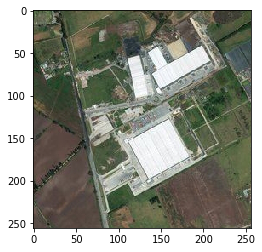

In [40]:
plt.imshow(patchs[150])

In [41]:
patchs[150].shape

(256, 256, 3)

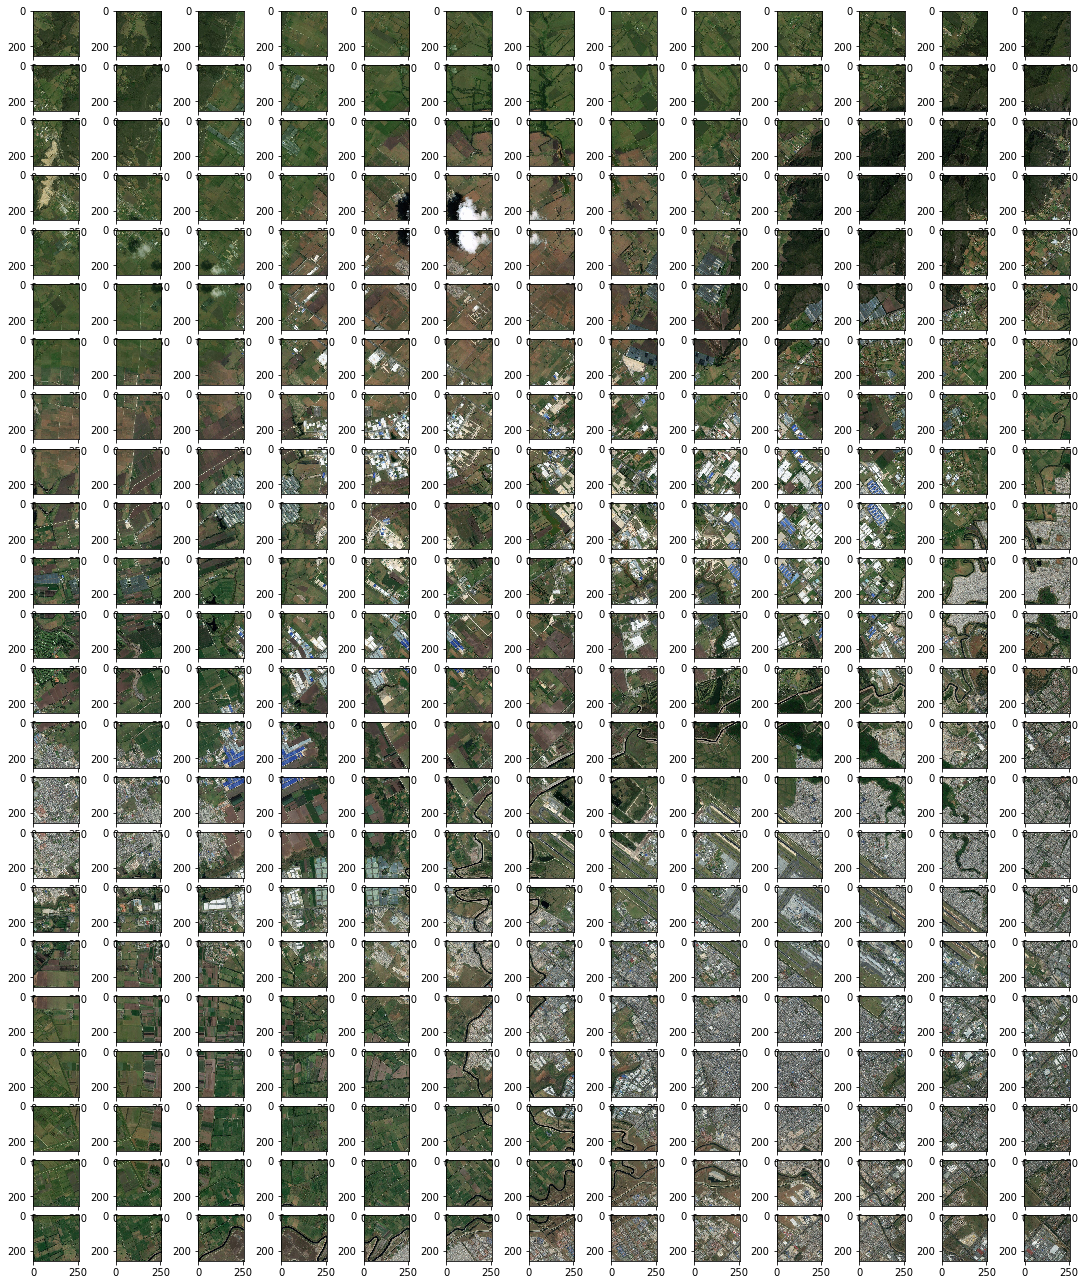

In [641]:
fig = plt.figure(figsize=(NW+6,NH))

for j,i in enumerate(patchs):
    ax=fig.add_subplot(NH,NW,j+1)
    plt.imshow(i)

In [7]:
def save_patchs(fname, patchs):
    for j,i in enumerate(patchs):       
        im = Image.fromarray(i)
        im.save(fname+"-"+str(j)+".png")
        print("Saving..")

In [53]:
save_patchs("./data/dataset/OVERLAECOBO/", patchs)

(256, 256, 3)
Imagen guarda ./data/dataset/OVERLAECOBO/-80600000000.png
(256, 256, 3)
Imagen guarda ./data/dataset/OVERLAECOBO/-80600000001.png
(256, 256, 3)
Imagen guarda ./data/dataset/OVERLAECOBO/-80600000002.png
(256, 256, 3)
Imagen guarda ./data/dataset/OVERLAECOBO/-80600000003.png
(256, 256, 3)
Imagen guarda ./data/dataset/OVERLAECOBO/-80600000004.png
(256, 256, 3)
Imagen guarda ./data/dataset/OVERLAECOBO/-80600000005.png
(256, 256, 3)
Imagen guarda ./data/dataset/OVERLAECOBO/-80600000006.png
(256, 256, 3)
Imagen guarda ./data/dataset/OVERLAECOBO/-80600000007.png
(256, 256, 3)
Imagen guarda ./data/dataset/OVERLAECOBO/-80600000008.png
(256, 256, 3)
Imagen guarda ./data/dataset/OVERLAECOBO/-80600000009.png
(256, 256, 3)
Imagen guarda ./data/dataset/OVERLAECOBO/-80600000010.png
(256, 256, 3)
Imagen guarda ./data/dataset/OVERLAECOBO/-80600000011.png
(256, 256, 3)
Imagen guarda ./data/dataset/OVERLAECOBO/-80600000012.png
(256, 256, 3)
Imagen guarda ./data/dataset/OVERLAECOBO/-80600000

Imagen guarda ./data/dataset/OVERLAECOBO/-80600000119.png
(256, 256, 3)
Imagen guarda ./data/dataset/OVERLAECOBO/-80600000120.png
(256, 256, 3)
Imagen guarda ./data/dataset/OVERLAECOBO/-80600000121.png
(256, 256, 3)
Imagen guarda ./data/dataset/OVERLAECOBO/-80600000122.png
(256, 256, 3)
Imagen guarda ./data/dataset/OVERLAECOBO/-80600000123.png
(256, 256, 3)
Imagen guarda ./data/dataset/OVERLAECOBO/-80600000124.png
(256, 256, 3)
Imagen guarda ./data/dataset/OVERLAECOBO/-80600000125.png
(256, 256, 3)
Imagen guarda ./data/dataset/OVERLAECOBO/-80600000126.png
(256, 256, 3)
Imagen guarda ./data/dataset/OVERLAECOBO/-80600000127.png
(256, 256, 3)
Imagen guarda ./data/dataset/OVERLAECOBO/-80600000128.png
(256, 256, 3)
Imagen guarda ./data/dataset/OVERLAECOBO/-80600000129.png
(256, 256, 3)
Imagen guarda ./data/dataset/OVERLAECOBO/-80600000130.png
(256, 256, 3)
Imagen guarda ./data/dataset/OVERLAECOBO/-80600000131.png
(256, 256, 3)
Imagen guarda ./data/dataset/OVERLAECOBO/-80600000132.png
(256, 

KeyboardInterrupt: 

### 1.5 Extracion de parches *from_SAS*

In [12]:
dir_list[3:10]

['OVERLAECOBO_13',
 'OVERLAECOBO_14',
 'OVERLAECOBO_15',
 'OVERLAECOBO_16',
 'OVERLAECOBO_17',
 'OVERLAECOBO_18',
 'OVERLAECOBO_19']

In [13]:
patch_w = 256
patch_h = 256
over = 30
for i in dir_list[3:10]:
    data_list = os.listdir('./data/dataset/OVERLAECOBO/'+i+"/mujer/")
    
    
    for j in data_list:
        if 1j != ".gitignore":
            img_to_extract = io.imread('./data/dataset/OVERLAECOBO/'+i+"/mujer/"+j)
            patchs, _, _, _, _ = extract_patch(img_to_extract[:,:,:3], patch_w, patch_h, over)
            save_patchs('./data/dataset/OVERLAECOBO/'+i+'/mujer/'+j[:-4], patchs)

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
Saving..
S

## OVERLAECOBO

### 2.1 to_erase *OVERLAECOBO*

Al hacer sacar los parches de las imagenes se obtuvieron nuevos parches que se puede eliminar. los cuales son los siguientes

In [14]:
to_erase =  pd.read_csv("./data/dataset/to_erase.csv")
to_erasa = list(to_erase["to_erase"].values)
to_erasa

['13-0.png',
 '14-0.png',
 '14-1.png',
 '14-12.png',
 '14-13.png',
 '14-18.png',
 '14-2.png',
 '14-24.png',
 '14-3.png',
 '14-48.png',
 '14-53.png',
 '14-54.png',
 '14-59.png',
 '14-6.png',
 '14-60.png',
 '14-61.png',
 '14-65.png',
 '14-7.png',
 '14-8.png',
 '15-0.png',
 '15-1.png',
 '15-104.png',
 '15-105.png',
 '15-117.png',
 '15-118.png',
 '15-13.png',
 '15-130.png',
 '15-14.png',
 '15-15.png',
 '15-155.png',
 '15-16.png',
 '15-167.png',
 '15-168.png',
 '15-17.png',
 '15-18.png',
 '15-180.png',
 '15-181.png',
 '15-19.png',
 '15-193.png',
 '15-194.png',
 '15-195.png',
 '15-2.png',
 '15-20.png',
 '15-205.png',
 '15-206.png',
 '15-207.png',
 '15-208.png',
 '15-209.png',
 '15-21.png',
 '15-218.png',
 '15-219.png',
 '15-220.png',
 '15-221.png',
 '15-222.png',
 '15-231.png',
 '15-232.png',
 '15-233.png',
 '15-234.png',
 '15-235.png',
 '15-244.png',
 '15-245.png',
 '15-246.png',
 '15-247.png',
 '15-248.png',
 '15-249.png',
 '15-256.png',
 '15-257.png',
 '15-258.png',
 '15-259.png',
 '15-26

In [15]:
for i in to_erasa:
    #print('./data/dataset/OVERLAECOBO/OVERLAECOBO_'+i[:2]+"/mujer/"+i)
    os.remove('./data/dataset/OVERLAECOBO/OVERLAECOBO_'+i[:2]+"/mujer/"+i)

FileNotFoundError: [WinError 2] El sistema no puede encontrar el archivo especificado: './data/dataset/OVERLAECOBO/OVERLAECOBO_20/mujer/20_1-17-0.png'

In [94]:
to_erase = os.listdir('./data/dataset/OVERLAECOBO/to_erase')
economic_layer = os.listdir('./data/dataset/OVERLAECOBO/economic_layer')
train_test = os.listdir('./data/dataset/OVERLAECOBO/train&test')
satellite = os.listdir('./data/dataset/OVERLAECOBO/satellite')
print("Nuevo contenido:")
print("Cantidad de imagenes: ",len(satellite))
print("Cantidad de imagenes: ",len(train_test))
print("Cantidad de imagenes: ",len(economic_layer))
print("Cantidad de imagenes: ",len(to_erase))

Nuevo contenido:
Cantidad de imagenes:  207855
Cantidad de imagenes:  207855
Cantidad de imagenes:  207855
Cantidad de imagenes:  207903


#### Nota en este punto se elimna la carpeta `to_erase` y el dataset `for_SAS`

### 2.2 Train and Test
Se usan las imagenes del directorio `train&test`, separandolas por su color, las azules seran usadas como la guia para train y las rojas para test, las imagenes que tienen prate de train y parte de test, osea imagenes con zonas azules  rojas, se pondran al que mayor proporcion tengan.

El conjunto de imagenes de todo bogota se dividio en dos partes `./data/dataset/train` y `./data/dataset/test`, ambas con una cantidad considerable de los distintos niveles socioeconomicos para no hacer un mal entrenamiento, la division se llevo acabo de forma geografica como lo muestra la siguiente imagen.

<center>
<div style="width:40%">
                       
![test_train](./vector/train_test_map.svg)
</div>

</center>

In [16]:
train_list = os.listdir('./data/dataset/OVERLAECOBO/train&test/train')
test_list = os.listdir('./data/dataset/OVERLAECOBO/train&test/test')
len(train_list), len(test_list)

FileNotFoundError: [WinError 3] El sistema no puede encontrar la ruta especificada: './data/dataset/OVERLAECOBO/train&test/train'

Se graban los nombres de los archivos que seran parte de train y test en un archivo

In [17]:
with open("./data/dataset/train_content.csv", "w") as file:
    file.write("TRAIN,\n")
    for i in train_list:
        file.write(i+",\n")

In [18]:
with open("./data/dataset/test_content.csv", "w") as file:
    file.write("TEST,\n")
    for i in test_list:
        file.write(i+",\n")

In [18]:
train_files =  pd.read_csv("./data/dataset/OVERLAECOBO/train_content.csv")
test_files =  pd.read_csv("./data/dataset/OVERLAECOBO/test_content.csv")

In [19]:
train_files.head()

TRAIN  Unnamed: 1
0   13-7.png         NaN
1   13-9.png         NaN
2  14-17.png         NaN
3  14-23.png         NaN
4  14-28.png         NaN

Se mueven las imagenes satelitales y las de nivel a carpetas de test y train, teniendo en cuenta las listas anteriormente creadas.

In [21]:
for i in train_files["TRAIN"].values:
    if "copia" not in i:
        os.rename('./data/dataset/OVERLAECOBO/OVERLAECOBO_'+i[:2]+"/mujer/"+i,'./data/dataset/OVERLAECOBO/OVERLAECOBO_'+i[:2]+"/mujer/train/"+i)
        #os.rename("./data/dataset/OVERLAECOBO/economic_layer/"+i,"./data/dataset/OVERLAECOBO/economic_layer/train/"+i)

FileNotFoundError: [WinError 2] El sistema no puede encontrar el archivo especificado: './data/dataset/OVERLAECOBO/OVERLAECOBO_20/mujer/20_10-23-102.png' -> './data/dataset/OVERLAECOBO/OVERLAECOBO_20/mujer/train/20_10-23-102.png'

In [22]:
for i in test_files["TEST"].values:
    if "copia" not in i:
        os.rename('./data/dataset/OVERLAECOBO/OVERLAECOBO_'+i[:2]+"/mujer/"+i,'./data/dataset/OVERLAECOBO/OVERLAECOBO_'+i[:2]+"/mujer/test/"+i)

        #os.rename("./data/dataset/OVERLAECOBO/economic_layer/"+i,"./data/dataset/OVERLAECOBO/economic_layer/test/"+i)

FileNotFoundError: [WinError 2] El sistema no puede encontrar el archivo especificado: './data/dataset/OVERLAECOBO/OVERLAECOBO_20/mujer/20_1-17-100.png' -> './data/dataset/OVERLAECOBO/OVERLAECOBO_20/mujer/test/20_1-17-100.png'

luego hacemos cambios para que el dataset quede con la siguiente escructura.
        - train
            - satellite
                - 13
                - 14
                - 15
                - 16
                - 17
                - 18
                - 19
                - 20
            - economic_layer
                - 13
                - 14
                - 15
                - 16
                - 17
                - 18
                - 19
                - 20
        - test
            - satellite
                - 13
                - 14
                - 15
                - 16
                - 17
                - 18
                - 19
                - 20
            - economic_layer
                - 13
                - 14
                - 15
                - 16
                - 17
                - 18
                - 19
                - 20

##### 2.2.1 Contenido
Ya estando el dataset con la estrucutra definida, obtenemos la informacion de esta estrucutra, en especial la cantidad de imagenes de cada carpeta, esta la opcion de renombrarlas, pero aun lo estoy pensando.

In [6]:
TYPE = ['train','test']
TYPE_IMAGE = [ 'economic_layer', 'satellite']
ZOOM = ['13', '14', '15', '16', '17', '18', '19', '20']
for i in TYPE:
    for j in TYPE_IMAGE:
        for k in ZOOM:
            content_list = os.listdir('./data/dataset/OVERLAECOBO/'+i+'/'+j+'/'+k)
            print(i,j,k,len(content_list))

train economic_layer 13 3
train economic_layer 14 25
train economic_layer 15 91
train economic_layer 16 322
train economic_layer 17 1204
train economic_layer 18 4585
train economic_layer 19 17995
train economic_layer 20 71261
train satellite 13 3
train satellite 14 25
train satellite 15 91
train satellite 16 322
train satellite 17 1204
train satellite 18 4585
train satellite 19 17995
train satellite 20 71261
test economic_layer 13 8
test economic_layer 14 25
test economic_layer 15 99
test economic_layer 16 348
test economic_layer 17 1339
test economic_layer 18 5334
test economic_layer 19 21110
test economic_layer 20 84121
test satellite 13 8
test satellite 14 25
test satellite 15 99
test satellite 16 348
test satellite 17 1339
test satellite 18 5334
test satellite 19 21110
test satellite 20 84121


In [10]:
content_overlaecobo =  pd.read_csv("./data/dataset/OVERLAECOBO/content.csv")
content_overlaecobo

TYPE       TYPE_IMAGE   ZOOM   COUNT
0   train   economic_layer     13       3
1   train   economic_layer     14      25
2   train   economic_layer     15      91
3   train   economic_layer     16     322
4   train   economic_layer     17    1204
5   train   economic_layer     18    4585
6   train   economic_layer     19   17995
7   train   economic_layer     20   71261
8   train        satellite     13       3
9   train        satellite     14      25
10  train        satellite     15      91
11  train        satellite     16     322
12  train        satellite     17    1204
13  train        satellite     18    4585
14  train        satellite     19   17995
15  train        satellite     20   71261
16   test   economic_layer     13       8
17   test   economic_layer     14      25
18   test   economic_layer     15      99
19   test   economic_layer     16     348
20   test   economic_layer     17    1339
21   test   economic_layer     18    5334
22   test   economic_layer     19   21110
23   test   economic_layer     20   84121
24   test        satellite     13       8
25   test        satellite     14      25
26   test        satellite     15      99
27   test        satellite     16     348
28   test        satellite     17    1339
29   test        satellite     18    5334
30   test        satellite     19   21110
31   test        satellite     20   84121

### 2.3 Renombrando
Por cuestiones de facilidad y evitar conocer los nombres de las imagenes `layer` se renombraran.

In [27]:
TYPE = ['train']
TYPE_IMAGE = [ 'mujer']
ZOOM = ['14','15','16','17']
for i in TYPE:
    for j in TYPE_IMAGE:
        for k in ZOOM:
            content_list = os.listdir('./data/dataset/OVERLAECOBO/OVERLAECOBO_'+k+'/'+j+'/'+i)
            for l, n in enumerate(content_list):
                if "git" not in n:
                    os.rename('./data/dataset/OVERLAECOBO/OVERLAECOBO_'+k+'/'+j+'/'+i+'/'+n, './data/dataset/OVERLAECOBO/OVERLAECOBO_'+k+'/'+j+'/'+i+'/'+str(l)+".png")
                    print(k,j,i,n,l)

14 mujer train 14-10.png 0
14 mujer train 14-11.png 1
14 mujer train 14-14.png 2
14 mujer train 14-15.png 3
14 mujer train 14-16.png 4
14 mujer train 14-19.png 5
14 mujer train 14-20.png 6
14 mujer train 14-21.png 7
14 mujer train 14-22.png 8
14 mujer train 14-25.png 9
14 mujer train 14-26.png 10
14 mujer train 14-27.png 11
14 mujer train 14-30.png 12
14 mujer train 14-31.png 13
14 mujer train 14-32.png 14
14 mujer train 14-36.png 15
14 mujer train 14-37.png 16
14 mujer train 14-38.png 17
14 mujer train 14-4.png 18
14 mujer train 14-42.png 19
14 mujer train 14-43.png 20
14 mujer train 14-49.png 21
14 mujer train 14-5.png 22
14 mujer train 14-9.png 23
15 mujer train 15-10.png 0
15 mujer train 15-100.png 1
15 mujer train 15-106.png 2
15 mujer train 15-107.png 3
15 mujer train 15-108.png 4
15 mujer train 15-109.png 5
15 mujer train 15-11.png 6
15 mujer train 15-110.png 7
15 mujer train 15-111.png 8
15 mujer train 15-112.png 9
15 mujer train 15-113.png 10
15 mujer train 15-119.png 11
15 mu

17 mujer train 17_1-2-269.png 37
17 mujer train 17_1-2-270.png 38
17 mujer train 17_1-2-271.png 39
17 mujer train 17_1-2-272.png 40
17 mujer train 17_1-2-278.png 41
17 mujer train 17_1-2-279.png 42
17 mujer train 17_1-2-280.png 43
17 mujer train 17_1-2-281.png 44
17 mujer train 17_1-2-282.png 45
17 mujer train 17_1-2-283.png 46
17 mujer train 17_1-2-284.png 47
17 mujer train 17_1-2-285.png 48
17 mujer train 17_1-2-289.png 49
17 mujer train 17_1-2-290.png 50
17 mujer train 17_1-2-291.png 51
17 mujer train 17_1-2-292.png 52
17 mujer train 17_1-2-293.png 53
17 mujer train 17_1-2-294.png 54
17 mujer train 17_1-2-295.png 55
17 mujer train 17_1-2-296.png 56
17 mujer train 17_1-2-297.png 57
17 mujer train 17_1-2-298.png 58
17 mujer train 17_1-3-0.png 59
17 mujer train 17_1-3-1.png 60
17 mujer train 17_1-3-10.png 61
17 mujer train 17_1-3-100.png 62
17 mujer train 17_1-3-101.png 63
17 mujer train 17_1-3-102.png 64
17 mujer train 17_1-3-103.png 65
17 mujer train 17_1-3-104.png 66
17 mujer train 

17 mujer train 17_2-2-160.png 369
17 mujer train 17_2-2-161.png 370
17 mujer train 17_2-2-162.png 371
17 mujer train 17_2-2-163.png 372
17 mujer train 17_2-2-164.png 373
17 mujer train 17_2-2-165.png 374
17 mujer train 17_2-2-166.png 375
17 mujer train 17_2-2-167.png 376
17 mujer train 17_2-2-168.png 377
17 mujer train 17_2-2-169.png 378
17 mujer train 17_2-2-17.png 379
17 mujer train 17_2-2-170.png 380
17 mujer train 17_2-2-171.png 381
17 mujer train 17_2-2-172.png 382
17 mujer train 17_2-2-173.png 383
17 mujer train 17_2-2-174.png 384
17 mujer train 17_2-2-175.png 385
17 mujer train 17_2-2-176.png 386
17 mujer train 17_2-2-177.png 387
17 mujer train 17_2-2-178.png 388
17 mujer train 17_2-2-179.png 389
17 mujer train 17_2-2-18.png 390
17 mujer train 17_2-2-180.png 391
17 mujer train 17_2-2-181.png 392
17 mujer train 17_2-2-182.png 393
17 mujer train 17_2-2-183.png 394
17 mujer train 17_2-2-184.png 395
17 mujer train 17_2-2-185.png 396
17 mujer train 17_2-2-186.png 397
17 mujer train 1

17 mujer train 17_2-3-56.png 718
17 mujer train 17_2-3-57.png 719
17 mujer train 17_2-3-58.png 720
17 mujer train 17_2-3-59.png 721
17 mujer train 17_2-3-6.png 722
17 mujer train 17_2-3-60.png 723
17 mujer train 17_2-3-61.png 724
17 mujer train 17_2-3-62.png 725
17 mujer train 17_2-3-63.png 726
17 mujer train 17_2-3-64.png 727
17 mujer train 17_2-3-65.png 728
17 mujer train 17_2-3-66.png 729
17 mujer train 17_2-3-67.png 730
17 mujer train 17_2-3-68.png 731
17 mujer train 17_2-3-69.png 732
17 mujer train 17_2-3-7.png 733
17 mujer train 17_2-3-70.png 734
17 mujer train 17_2-3-71.png 735
17 mujer train 17_2-3-72.png 736
17 mujer train 17_2-3-73.png 737
17 mujer train 17_2-3-74.png 738
17 mujer train 17_2-3-75.png 739
17 mujer train 17_2-3-76.png 740
17 mujer train 17_2-3-78.png 741
17 mujer train 17_2-3-79.png 742
17 mujer train 17_2-3-8.png 743
17 mujer train 17_2-3-80.png 744
17 mujer train 17_2-3-81.png 745
17 mujer train 17_2-3-82.png 746
17 mujer train 17_2-3-83.png 747
17 mujer trai

17 mujer train 17_3-2-34.png 1069
17 mujer train 17_3-2-35.png 1070
17 mujer train 17_3-2-36.png 1071
17 mujer train 17_3-2-37.png 1072
17 mujer train 17_3-2-38.png 1073
17 mujer train 17_3-2-39.png 1074
17 mujer train 17_3-2-4.png 1075
17 mujer train 17_3-2-40.png 1076
17 mujer train 17_3-2-41.png 1077
17 mujer train 17_3-2-42.png 1078
17 mujer train 17_3-2-43.png 1079
17 mujer train 17_3-2-44.png 1080
17 mujer train 17_3-2-45.png 1081
17 mujer train 17_3-2-46.png 1082
17 mujer train 17_3-2-47.png 1083
17 mujer train 17_3-2-48.png 1084
17 mujer train 17_3-2-49.png 1085
17 mujer train 17_3-2-5.png 1086
17 mujer train 17_3-2-50.png 1087
17 mujer train 17_3-2-51.png 1088
17 mujer train 17_3-2-52.png 1089
17 mujer train 17_3-2-53.png 1090
17 mujer train 17_3-2-54.png 1091
17 mujer train 17_3-2-55.png 1092
17 mujer train 17_3-2-56.png 1093
17 mujer train 17_3-2-57.png 1094
17 mujer train 17_3-2-58.png 1095
17 mujer train 17_3-2-59.png 1096
17 mujer train 17_3-2-6.png 1097
17 mujer train 17

### 2.4 GET TARGET
Hablando con el profe Raul, me comento que de las imagenes de la carpeta `economic_layer` debo sacar una matriz de dos dimenciones donde cada posicion es la clase a la que pertene cada pixel de la imagen layer. Pare eso pues debo sacar un algoritmo que tome el color y le asigne una clase, teniendo en cuenta obviamente que no todos los colores tendran exactamente los mismos valores RGB. por ahora hagamos una exploracion.

#### Estrato 1

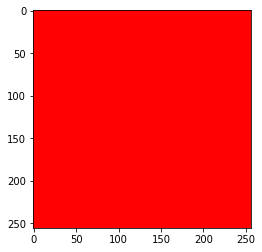

In [64]:
layer_img = io.imread("./data/dataset/OVERLAECOBO/train/economic_layer/20/60.png")
plt.imshow(layer_img)

In [66]:
layer_img.shape

(256, 256, 3)

In [67]:
RGB_red_class1 = layer_img.reshape(256*256,3)[0]
"Estrato 1", list(RGB_red_class1)

('Estrato 1', [255, 1, 1])

#### Estrato 2

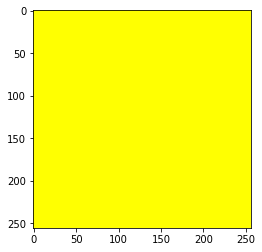

In [24]:
layer_img = io.imread("./data/dataset/OVERLAECOBO/train/economic_layer/20/56.png")
plt.imshow(layer_img)

In [31]:
layer_img.shape

(256, 256, 3)

In [63]:
RGB_yellow_class2 = layer_img.reshape(256*256,3)[0]
"Estrato 2", list(RGB_yellow_class2)

('Estrato 2', [255, 255, 1])

#### Estrato 3

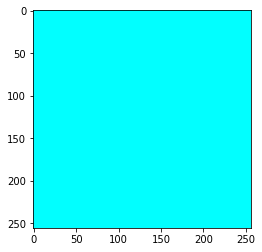

In [71]:
layer_img = io.imread("./data/dataset/OVERLAECOBO/train/economic_layer/20/3331.png")
plt.imshow(layer_img)

In [74]:
layer_img.shape

(256, 256, 3)

In [72]:
RGB_ligthBlue_class3 = layer_img.reshape(256*256,3)[0]
"Estrato 3", list(RGB_ligthBlue_class3)

('Estrato 3', [1, 255, 255])

#### Estrato 4

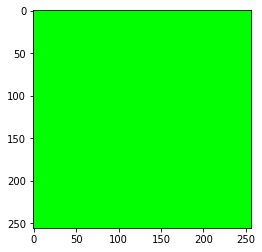

In [73]:
layer_img = io.imread("./data/dataset/OVERLAECOBO/train/economic_layer/20/36288.png")
plt.imshow(layer_img)

In [75]:
layer_img.shape

(256, 256, 3)

In [76]:
RGB_ligthGreen_class4 = layer_img.reshape(256*256,3)[0]
"Estrato 4", list(RGB_ligthGreen_class4)

('Estrato 4', [1, 255, 1])

#### Estrato 5

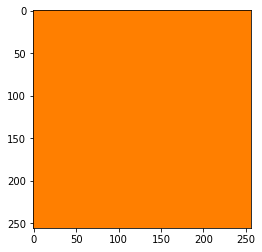

In [77]:
layer_img = io.imread("./data/dataset/OVERLAECOBO/train/economic_layer/20/36309.png")
plt.imshow(layer_img)

In [79]:
layer_img.shape

(256, 256, 3)

In [83]:
RGB_orange_class5 = layer_img.reshape(256*256,3)[0]
"Estrato 5", list(RGB_orange_class5)

('Estrato 5', [255, 127, 0])

#### Estrato 6

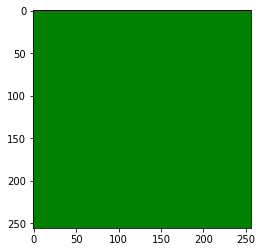

In [84]:
layer_img = io.imread("./data/dataset/OVERLAECOBO/train/economic_layer/20/51217.png")
plt.imshow(layer_img)

In [85]:
layer_img.shape

(256, 256, 3)

In [90]:
RGB_Green_class6 = layer_img.reshape(256*256,3)[0]
"Estrato 6", list(RGB_Green_class6)

('Estrato 6', [2, 128, 2])

#### NO definido

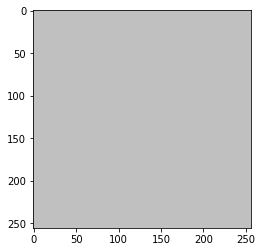

In [91]:
layer_img = io.imread("./data/dataset/OVERLAECOBO/train/economic_layer/20/560.png")
plt.imshow(layer_img)

In [ ]:
layer_img.shape

In [92]:
RGB_Gray_class0 = layer_img.reshape(256*256,3)[0]
"No definido", list(RGB_Gray_class0)

('No definido', [192, 192, 192])

In [102]:
class1 = RGB_red_class1
class2 = RGB_yellow_class2
class3 = RGB_ligthBlue_class3
class4 = RGB_ligthGreen_class4
class5 = RGB_orange_class5
class6 = RGB_Green_class6
class0 = RGB_Gray_class0
print("Estrato 1: ", RGB_red_class1)
print("Estrato 2: ", RGB_yellow_class2)
print("Estrato 3: ", RGB_ligthBlue_class3)
print("Estrato 4: ", RGB_ligthGreen_class4)
print("Estrato 5: ", RGB_orange_class5)
print("Estrato 6: ", RGB_Green_class6)
print("No Definido: ", RGB_Gray_class0)

Estrato 1:  [255   1   1]
Estrato 2:  [255 255   1]
Estrato 3:  [  1 255 255]
Estrato 4:  [  1 255   1]
Estrato 5:  [255 127   0]
Estrato 6:  [  2 128   2]
No Definido:  [192 192 192]


#### 2.4.1 Matrices target

Se puede hacer la etiquetacion de clases usando un "arbol de desicion", no lo de machine learning pero si usando un arbol de `if's` mirando pixeles

In [2]:
def get_target_matrix(layer_to_extract):
    
    to_extract = layer_to_extract.reshape(256*256,3)
    newmat = np.zeros((256*256,))+45

    for j,i in enumerate(to_extract):

        # Clases 3, 4 o 6
        if i[0] <= 96:

            # Clase 3
            if 150 <= i[2]:
                newmat[j] = 3
            
            # Clase 3 o 4
            if 150 >= i[2]:

                # Clase 4
                if 190 <= i[1]:
                    newmat[j] = 4

                # Clases 6:
                if i[1] <= 190:
                    newmat[j] = 6


        # Clases 1, 2, 5 o 0
        if 96 <= i[0]:
            
            # Clases 0:
            if i[2] > 130:
                newmat[j] = 0
            
            # Clases 1, 2 o 5:
            if i[2] <= 130:
                newmat[j] = 0          

                # Clases 5:
                if 64 < i[1] < 191:
                    newmat[j] = 5

                # Clases 2:
                if 191 <= i[1]:
                    newmat[j] = 2

                # Clase 1:
                if i[1] <= 64:
                    newmat[j] = 1
           
    return newmat.reshape((256,256))
        

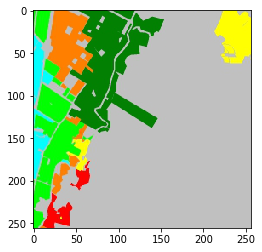

In [277]:
layer_to_extract = io.imread("./data/dataset/OVERLAECOBO/train/economic_layer/14/6.png")
plt.imshow(layer_to_extract)

In [278]:
layer_to_extract.shape

(256, 256, 3)

In [302]:
layer_to_extract[0][0]

array([  0, 255,   0], dtype=uint8)

Podemos pasar de la imagen RGB a la `imagen de clases`

In [279]:
mask = get_target_matrix(layer_to_extract)
mask.shape

(256, 256)

In [280]:
mask, np.unique(mask)

(array([[4., 4., 4., ..., 0., 0., 0.],
        [4., 4., 4., ..., 0., 0., 0.],
        [4., 4., 4., ..., 0., 0., 0.],
        ...,
        [4., 4., 4., ..., 0., 0., 0.],
        [4., 4., 4., ..., 0., 0., 0.],
        [4., 4., 4., ..., 0., 0., 0.]]), array([0., 1., 2., 3., 4., 5., 6.]))

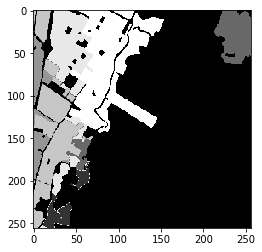

In [281]:
plt.imshow(mask,  cmap = plt.cm.Greys_r )

O devolvernos de la `imagen de clases` a la imagen RGB

In [330]:
def target_matrix_to_image_color(mask):
        
    to_extract = mask.reshape((256*256,1))
    newmat = []

    for j,i in enumerate(to_extract):
        if i == 0:
            newmat.append([192, 192, 192])
        if i == 1:
            newmat.append([255, 1, 1])
        if i == 2:
            newmat.append([225, 255, 1])
        if i == 3:
            newmat.append([1, 255, 255])
        if i == 4:
            newmat.append([1, 255, 1])
        if i == 5:
            newmat.append([255, 127, 0])
        if i == 6:
            newmat.append([2, 128, 2])
    return np.array(newmat).reshape((256,256,3))

In [331]:
img_new = target_matrix_to_image_color(mask)
img_new = img_new.astype("uint8")

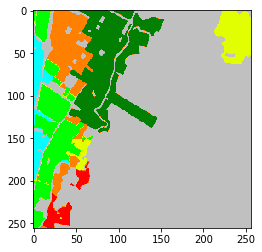

In [332]:
plt.imshow(img_new)

Existe una pequeña diferencia. a la derecha la imagen `Òriginal` y la izquierda la obtenidad desde la `imagen de clases`

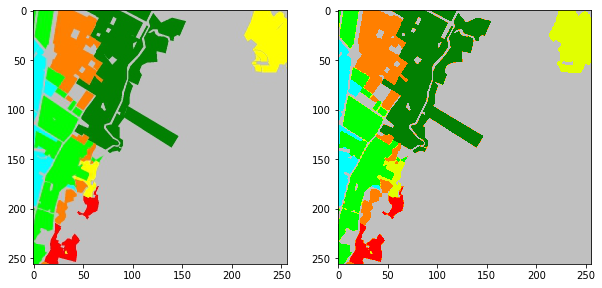

In [340]:
rimg = layer_to_extract
img = img_new
fig = plt.figure(figsize=(10,5))
fig.add_subplot(121)
plt.imshow(rimg);
fig.add_subplot(122)
plt.imshow(img);

### GET ALL TARGET MATRIX:

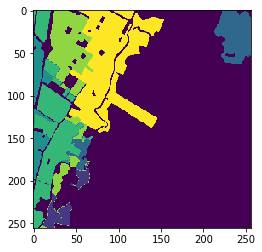

In [6]:
TYPE = ['train'.'test']
TYPE_IMAGE = [ 'economic_layer','satellite']
ZOOM = ['13','14','15','16','17','18','18','20']
for i in TYPE:
    for j in TYPE_IMAGE:
        for k in ZOOM:
            content_list = os.listdir('./data/dataset/OVERLAECOBO/'+i+'/'+j+'/'+k)
            for n in content_list:
                if "git" not in n:
                    if not os.path.isfile('./data/dataset/OVERLAECOBO/'+i+'/'+'target'+'/'+k+'/'+n):                        
                        #os.rename('./data/dataset/OVERLAECOBO/'+i+'/'+j+'/'+k+'/'+n, './data/dataset/OVERLAECOBO/'+i+'/'+j+'/'+k+'/'+str(l-1)+".png")
                        layer_to_extract = io.imread('./data/dataset/OVERLAECOBO/'+i+'/'+j+'/'+k+'/'+n)
                        print('PROSESANDO..../data/dataset/OVERLAECOBO/'+i+'/'+j+'/'+k+'/'+n)
                        mask = get_target_matrix(layer_to_extract).astype("uint8")
                        im = Image.fromarray(mask)
                        im.save('./data/dataset/OVERLAECOBO/'+i+'/'+'target'+'/'+k+'/'+n)

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60586.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60587.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60588.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60589.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6059.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60590.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60591.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60592.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60593.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60594.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60595.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60596.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60597.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60686.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60687.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60688.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60689.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6069.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60690.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60691.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60692.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60693.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60694.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60695.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60696.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60697.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60786.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60787.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60788.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60789.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6079.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60790.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60791.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60792.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60793.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60794.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60795.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60796.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60797.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60886.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60887.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60888.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60889.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6089.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60890.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60891.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60892.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60893.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60894.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60895.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60896.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60897.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60986.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60987.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60988.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60989.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6099.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60990.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60991.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60992.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60993.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60994.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60995.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60996.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/60997.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61085.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61086.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61087.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61088.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61089.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6109.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61090.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61091.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61092.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61093.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61094.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61095.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61096.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61185.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61186.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61187.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61188.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61189.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6119.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61190.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61191.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61192.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61193.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61194.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61195.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61196.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61285.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61286.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61287.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61288.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61289.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6129.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61290.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61291.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61292.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61293.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61294.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61295.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61296.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61385.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61386.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61387.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61388.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61389.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6139.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61390.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61391.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61392.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61393.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61394.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61395.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61396.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61485.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61486.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61487.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61488.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61489.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6149.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61490.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61491.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61492.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61493.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61494.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61495.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61496.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61585.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61586.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61587.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61588.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61589.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6159.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61590.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61591.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61592.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61593.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61594.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61595.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61596.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61685.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61686.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61687.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61688.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61689.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6169.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61690.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61691.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61692.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61693.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61694.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61695.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61696.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61785.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61786.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61787.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61788.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61789.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6179.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61790.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61791.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61792.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61793.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61794.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61795.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61796.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61885.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61886.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61887.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61888.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61889.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6189.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61890.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61891.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61892.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61893.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61894.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61895.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61896.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61985.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61986.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61987.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61988.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61989.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6199.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61990.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61991.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61992.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61993.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61994.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61995.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/61996.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62084.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62085.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62086.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62087.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62088.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62089.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6209.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62090.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62091.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62092.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62093.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62094.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62095.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62184.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62185.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62186.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62187.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62188.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62189.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6219.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62190.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62191.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62192.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62193.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62194.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62195.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62284.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62285.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62286.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62287.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62288.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62289.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6229.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62290.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62291.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62292.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62293.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62294.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62295.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62384.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62385.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62386.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62387.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62388.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62389.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6239.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62390.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62391.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62392.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62393.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62394.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62395.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62484.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62485.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62486.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62487.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62488.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62489.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6249.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62490.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62491.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62492.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62493.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62494.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62495.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62584.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62585.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62586.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62587.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62588.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62589.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6259.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62590.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62591.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62592.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62593.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62594.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62595.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62684.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62685.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62686.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62687.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62688.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62689.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6269.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62690.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62691.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62692.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62693.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62694.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62695.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62784.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62785.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62786.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62787.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62788.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62789.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6279.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62790.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62791.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62792.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62793.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62794.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62795.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62884.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62885.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62886.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62887.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62888.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62889.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6289.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62890.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62891.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62892.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62893.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62894.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62895.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62984.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62985.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62986.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62987.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62988.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62989.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6299.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62990.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62991.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62992.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62993.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62994.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/62995.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63083.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63084.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63085.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63086.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63087.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63088.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63089.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6309.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63090.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63091.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63092.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63093.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63094.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63183.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63184.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63185.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63186.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63187.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63188.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63189.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6319.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63190.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63191.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63192.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63193.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63194.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63283.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63284.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63285.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63286.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63287.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63288.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63289.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6329.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63290.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63291.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63292.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63293.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63294.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63383.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63384.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63385.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63386.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63387.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63388.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63389.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6339.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63390.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63391.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63392.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63393.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63394.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63483.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63484.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63485.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63486.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63487.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63488.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63489.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6349.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63490.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63491.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63492.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63493.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63494.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63583.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63584.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63585.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63586.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63587.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63588.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63589.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6359.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63590.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63591.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63592.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63593.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63594.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63683.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63684.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63685.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63686.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63687.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63688.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63689.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6369.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63690.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63691.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63692.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63693.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63694.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63783.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63784.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63785.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63786.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63787.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63788.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63789.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6379.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63790.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63791.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63792.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63793.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63794.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63883.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63884.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63885.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63886.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63887.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63888.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63889.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6389.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63890.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63891.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63892.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63893.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63894.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63983.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63984.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63985.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63986.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63987.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63988.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63989.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6399.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63990.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63991.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63992.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63993.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/63994.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64082.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64083.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64084.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64085.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64086.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64087.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64088.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64089.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6409.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64090.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64091.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64092.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64093.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64182.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64183.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64184.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64185.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64186.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64187.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64188.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64189.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6419.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64190.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64191.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64192.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64193.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64282.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64283.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64284.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64285.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64286.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64287.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64288.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64289.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6429.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64290.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64291.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64292.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64293.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64382.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64383.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64384.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64385.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64386.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64387.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64388.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64389.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6439.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64390.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64391.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64392.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64393.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64482.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64483.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64484.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64485.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64486.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64487.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64488.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64489.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6449.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64490.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64491.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64492.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64493.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64582.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64583.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64584.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64585.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64586.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64587.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64588.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64589.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6459.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64590.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64591.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64592.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64593.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64682.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64683.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64684.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64685.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64686.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64687.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64688.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64689.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6469.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64690.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64691.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64692.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64693.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64782.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64783.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64784.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64785.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64786.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64787.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64788.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64789.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6479.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64790.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64791.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64792.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64793.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64882.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64883.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64884.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64885.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64886.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64887.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64888.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64889.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6489.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64890.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64891.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64892.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64893.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64982.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64983.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64984.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64985.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64986.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64987.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64988.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64989.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6499.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64990.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64991.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64992.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/64993.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65081.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65082.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65083.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65084.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65085.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65086.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65087.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65088.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65089.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6509.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65090.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65091.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65092.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65181.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65182.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65183.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65184.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65185.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65186.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65187.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65188.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65189.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6519.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65190.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65191.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65192.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65281.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65282.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65283.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65284.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65285.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65286.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65287.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65288.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65289.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6529.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65290.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65291.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65292.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65381.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65382.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65383.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65384.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65385.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65386.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65387.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65388.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65389.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6539.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65390.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65391.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65392.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65481.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65482.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65483.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65484.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65485.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65486.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65487.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65488.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65489.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6549.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65490.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65491.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65492.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65581.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65582.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65583.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65584.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65585.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65586.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65587.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65588.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65589.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6559.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65590.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65591.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65592.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65681.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65682.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65683.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65684.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65685.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65686.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65687.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65688.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65689.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6569.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65690.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65691.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65692.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65781.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65782.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65783.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65784.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65785.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65786.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65787.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65788.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65789.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6579.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65790.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65791.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65792.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65881.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65882.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65883.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65884.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65885.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65886.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65887.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65888.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65889.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6589.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65890.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65891.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65892.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65981.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65982.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65983.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65984.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65985.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65986.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65987.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65988.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65989.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6599.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65990.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65991.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/65992.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66080.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66081.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66082.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66083.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66084.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66085.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66086.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66087.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66088.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66089.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6609.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66090.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66091.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66180.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66181.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66182.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66183.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66184.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66185.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66186.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66187.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66188.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66189.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6619.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66190.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66191.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66280.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66281.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66282.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66283.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66284.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66285.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66286.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66287.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66288.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66289.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6629.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66290.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66291.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66380.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66381.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66382.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66383.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66384.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66385.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66386.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66387.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66388.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66389.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6639.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66390.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66391.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66480.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66481.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66482.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66483.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66484.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66485.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66486.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66487.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66488.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66489.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6649.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66490.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66491.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66580.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66581.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66582.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66583.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66584.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66585.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66586.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66587.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66588.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66589.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6659.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66590.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66591.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66680.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66681.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66682.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66683.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66684.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66685.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66686.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66687.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66688.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66689.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6669.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66690.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66691.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66780.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66781.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66782.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66783.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66784.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66785.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66786.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66787.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66788.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66789.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6679.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66790.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66791.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66880.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66881.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66882.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66883.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66884.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66885.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66886.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66887.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66888.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66889.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6689.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66890.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66891.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66980.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66981.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66982.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66983.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66984.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66985.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66986.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66987.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66988.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66989.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6699.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66990.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/66991.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6708.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67080.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67081.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67082.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67083.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67084.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67085.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67086.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67087.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67088.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67089.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6709.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67090.png
PROSESANDO..../data/dataset/OVERLAECOBO/

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6718.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67180.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67181.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67182.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67183.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67184.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67185.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67186.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67187.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67188.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67189.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6719.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67190.png
PROSESANDO..../data/dataset/OVERLAECOBO/

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6728.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67280.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67281.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67282.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67283.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67284.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67285.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67286.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67287.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67288.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67289.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6729.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67290.png
PROSESANDO..../data/dataset/OVERLAECOBO/

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6738.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67380.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67381.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67382.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67383.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67384.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67385.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67386.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67387.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67388.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67389.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6739.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67390.png
PROSESANDO..../data/dataset/OVERLAECOBO/

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6748.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67480.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67481.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67482.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67483.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67484.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67485.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67486.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67487.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67488.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67489.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6749.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67490.png
PROSESANDO..../data/dataset/OVERLAECOBO/

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6758.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67580.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67581.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67582.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67583.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67584.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67585.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67586.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67587.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67588.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67589.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6759.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67590.png
PROSESANDO..../data/dataset/OVERLAECOBO/

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6768.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67680.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67681.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67682.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67683.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67684.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67685.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67686.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67687.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67688.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67689.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6769.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67690.png
PROSESANDO..../data/dataset/OVERLAECOBO/

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6778.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67780.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67781.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67782.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67783.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67784.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67785.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67786.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67787.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67788.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67789.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6779.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67790.png
PROSESANDO..../data/dataset/OVERLAECOBO/

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6788.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67880.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67881.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67882.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67883.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67884.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67885.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67886.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67887.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67888.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67889.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6789.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67890.png
PROSESANDO..../data/dataset/OVERLAECOBO/

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6798.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67980.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67981.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67982.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67983.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67984.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67985.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67986.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67987.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67988.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67989.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6799.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/67990.png
PROSESANDO..../data/dataset/OVERLAECOBO/

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68079.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6808.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68080.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68081.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68082.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68083.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68084.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68085.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68086.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68087.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68088.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68089.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6809.png
PROSESANDO..../data/dataset/OVERLAECOBO/

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68179.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6818.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68180.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68181.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68182.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68183.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68184.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68185.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68186.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68187.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68188.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68189.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6819.png
PROSESANDO..../data/dataset/OVERLAECOBO/

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68279.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6828.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68280.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68281.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68282.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68283.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68284.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68285.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68286.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68287.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68288.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68289.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6829.png
PROSESANDO..../data/dataset/OVERLAECOBO/

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68379.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6838.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68380.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68381.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68382.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68383.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68384.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68385.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68386.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68387.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68388.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68389.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6839.png
PROSESANDO..../data/dataset/OVERLAECOBO/

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68479.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6848.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68480.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68481.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68482.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68483.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68484.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68485.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68486.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68487.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68488.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68489.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6849.png
PROSESANDO..../data/dataset/OVERLAECOBO/

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68579.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6858.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68580.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68581.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68582.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68583.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68584.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68585.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68586.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68587.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68588.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68589.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6859.png
PROSESANDO..../data/dataset/OVERLAECOBO/

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68679.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6868.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68680.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68681.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68682.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68683.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68684.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68685.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68686.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68687.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68688.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68689.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6869.png
PROSESANDO..../data/dataset/OVERLAECOBO/

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68779.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6878.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68780.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68781.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68782.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68783.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68784.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68785.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68786.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68787.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68788.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68789.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6879.png
PROSESANDO..../data/dataset/OVERLAECOBO/

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68879.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6888.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68880.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68881.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68882.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68883.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68884.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68885.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68886.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68887.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68888.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68889.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6889.png
PROSESANDO..../data/dataset/OVERLAECOBO/

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68979.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6898.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68980.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68981.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68982.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68983.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68984.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68985.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68986.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68987.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68988.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/68989.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6899.png
PROSESANDO..../data/dataset/OVERLAECOBO/

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69078.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69079.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6908.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69080.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69081.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69082.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69083.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69084.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69085.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69086.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69087.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69088.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69089.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69178.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69179.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6918.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69180.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69181.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69182.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69183.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69184.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69185.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69186.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69187.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69188.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69189.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69278.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69279.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6928.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69280.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69281.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69282.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69283.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69284.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69285.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69286.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69287.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69288.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69289.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69378.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69379.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6938.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69380.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69381.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69382.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69383.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69384.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69385.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69386.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69387.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69388.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69389.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69478.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69479.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6948.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69480.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69481.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69482.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69483.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69484.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69485.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69486.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69487.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69488.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69489.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69578.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69579.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6958.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69580.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69581.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69582.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69583.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69584.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69585.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69586.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69587.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69588.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69589.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69678.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69679.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6968.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69680.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69681.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69682.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69683.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69684.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69685.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69686.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69687.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69688.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69689.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69778.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69779.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6978.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69780.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69781.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69782.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69783.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69784.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69785.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69786.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69787.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69788.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69789.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69878.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69879.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6988.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69880.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69881.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69882.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69883.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69884.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69885.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69886.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69887.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69888.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69889.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69978.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69979.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/6998.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69980.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69981.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69982.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69983.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69984.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69985.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69986.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69987.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69988.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/69989.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70076.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70077.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70078.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70079.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7008.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70080.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70081.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70082.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70083.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70084.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70085.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70086.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70087.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70176.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70177.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70178.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70179.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7018.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70180.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70181.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70182.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70183.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70184.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70185.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70186.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70187.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70276.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70277.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70278.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70279.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7028.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70280.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70281.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70282.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70283.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70284.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70285.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70286.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70287.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70376.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70377.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70378.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70379.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7038.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70380.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70381.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70382.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70383.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70384.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70385.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70386.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70387.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70476.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70477.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70478.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70479.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7048.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70480.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70481.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70482.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70483.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70484.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70485.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70486.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70487.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70576.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70577.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70578.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70579.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7058.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70580.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70581.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70582.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70583.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70584.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70585.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70586.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70587.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70676.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70677.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70678.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70679.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7068.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70680.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70681.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70682.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70683.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70684.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70685.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70686.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70687.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70776.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70777.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70778.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70779.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7078.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70780.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70781.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70782.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70783.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70784.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70785.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70786.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70787.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70876.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70877.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70878.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70879.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7088.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70880.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70881.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70882.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70883.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70884.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70885.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70886.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70887.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70976.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70977.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70978.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70979.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7098.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70980.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70981.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70982.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70983.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70984.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70985.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70986.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/70987.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/71075.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/71076.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/71077.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/71078.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/71079.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7108.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/71080.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/71081.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/71082.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/71083.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/71084.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/71085.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/71086.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/71175.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/71176.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/71177.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/71178.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/71179.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7118.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/71180.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/71181.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/71182.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/71183.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/71184.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/71185.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/71186.png
PROSESANDO..../data/dataset/OVERLAECOBO

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7142.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7143.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7144.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7145.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7146.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7147.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7148.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7149.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/715.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7150.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7151.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7152.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7153.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/econom

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7244.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7245.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7246.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7247.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7248.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7249.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/725.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7250.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7251.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7252.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7253.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7254.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7255.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/econom

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7346.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7347.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7348.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7349.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/735.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7350.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7351.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7352.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7353.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7354.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7355.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7356.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7357.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/econom

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7448.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7449.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/745.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7450.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7451.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7452.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7453.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7454.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7455.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7456.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7457.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7458.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7459.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/econom

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/755.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7550.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7551.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7552.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7553.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7554.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7555.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7556.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7557.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7558.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7559.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/756.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7560.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economi

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7651.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7652.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7653.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7654.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7655.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7656.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7657.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7658.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7659.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/766.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7660.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7661.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7662.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/econom

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7753.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7754.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7755.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7756.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7757.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7758.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7759.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/776.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7760.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7761.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7762.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7763.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7764.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/econom

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7855.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7856.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7857.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7858.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7859.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/786.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7860.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7861.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7862.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7863.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7864.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7865.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7866.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/econom

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7957.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7958.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7959.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/796.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7960.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7961.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7962.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7963.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7964.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7965.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7966.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7967.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/7968.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/econom

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8058.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8059.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/806.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8060.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8061.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8062.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8063.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8064.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8065.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8066.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8067.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8068.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8069.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/econom

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/816.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8160.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8161.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8162.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8163.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8164.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8165.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8166.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8167.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8168.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8169.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/817.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8170.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economi

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8261.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8262.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8263.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8264.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8265.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8266.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8267.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8268.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8269.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/827.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8270.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8271.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8272.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/econom

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8363.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8364.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8365.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8366.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8367.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8368.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8369.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/837.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8370.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8371.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8372.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8373.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8374.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/econom

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8465.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8466.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8467.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8468.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8469.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/847.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8470.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8471.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8472.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8473.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8474.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8475.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8476.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/econom

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8567.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8568.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8569.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/857.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8570.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8571.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8572.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8573.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8574.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8575.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8576.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8577.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8578.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/econom

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8669.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/867.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8670.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8671.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8672.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8673.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8674.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8675.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8676.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8677.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8678.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8679.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/868.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economi

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8770.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8771.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8772.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8773.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8774.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8775.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8776.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8777.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8778.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8779.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/878.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8780.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8781.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/econom

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8872.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8873.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8874.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8875.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8876.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8877.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8878.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8879.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/888.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8880.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8881.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8882.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8883.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/econom

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8974.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8975.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8976.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8977.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8978.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8979.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/898.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8980.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8981.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8982.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8983.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8984.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/8985.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/econom

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9075.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9076.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9077.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9078.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9079.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/908.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9080.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9081.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9082.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9083.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9084.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9085.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9086.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/econom

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9177.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9178.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9179.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/918.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9180.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9181.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9182.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9183.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9184.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9185.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9186.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9187.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9188.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/econom

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9279.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/928.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9280.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9281.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9282.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9283.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9284.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9285.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9286.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9287.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9288.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9289.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/929.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economi

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9380.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9381.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9382.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9383.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9384.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9385.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9386.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9387.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9388.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9389.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/939.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9390.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9391.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/econom

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9482.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9483.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9484.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9485.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9486.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9487.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9488.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9489.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/949.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9490.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9491.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9492.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9493.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/econom

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9584.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9585.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9586.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9587.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9588.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9589.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/959.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9590.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9591.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9592.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9593.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9594.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9595.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/econom

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9686.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9687.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9688.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9689.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/969.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9690.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9691.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9692.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9693.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9694.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9695.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9696.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9697.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/econom

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9788.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9789.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/979.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9790.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9791.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9792.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9793.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9794.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9795.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9796.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9797.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9798.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9799.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/econom

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/989.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9890.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9891.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9892.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9893.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9894.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9895.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9896.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9897.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9898.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9899.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/99.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/990.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_

PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9991.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9992.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9993.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9994.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9995.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9996.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9997.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9998.png
PROSESANDO..../data/dataset/OVERLAECOBO/train/economic_layer/20/9999.png


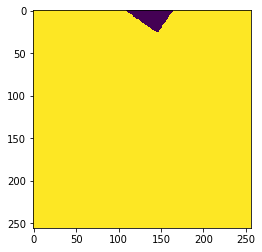

In [4]:
img = io.imread('./data/dataset/OVERLAECOBO/train/target/19/324.png')
plt.imshow(img)

In [7]:
TYPE = ['train','test']
TYPE_IMAGE = [ 'economic_layer','satellite']
ZOOM = ['13','14','15','16','17','18','18','20']
for i in TYPE:
    for j in TYPE_IMAGE:
        for k in ZOOM:
            content_list = os.listdir('./data/dataset/OVERLAECOBO/'+i+'/'+j+'/'+k)
            print(i, j, k, len(content_list))

train economic_layer 13 3
train economic_layer 14 25
train economic_layer 15 91
train economic_layer 16 322
train economic_layer 17 1204
train economic_layer 18 4585
train economic_layer 18 4585
train economic_layer 20 71261
train satellite 13 3
train satellite 14 25
train satellite 15 91
train satellite 16 322
train satellite 17 1204
train satellite 18 4585
train satellite 18 4585
train satellite 20 71261
test economic_layer 13 8
test economic_layer 14 25
test economic_layer 15 99
test economic_layer 16 348
test economic_layer 17 1339
test economic_layer 18 5334
test economic_layer 18 5334
test economic_layer 20 84121
test satellite 13 8
test satellite 14 25
test satellite 15 99
test satellite 16 348
test satellite 17 1339
test satellite 18 5334
test satellite 18 5334
test satellite 20 84121


In [67]:

print(perce.shape)

TYPE = ['train', 'test']
TYPE_IMAGE = [ 'target']
ZOOM = ['13','14','15','16','17','18','19','20']
for i in TYPE:
    for j in TYPE_IMAGE:
        for k in ZOOM:
            perce = np.zeros(7)
            content_list = os.listdir('./data/dataset/OVERLAECOBO/'+i+'/'+j+'/'+k)
            for n in content_list:
                if "git" not in n:
                    img = io.imread('./data/dataset/OVERLAECOBO/'+i+'/'+j+'/'+k+'/'+n)
                    
                    class0 = sum(sum(img == 0))
                    class1 = sum(sum(img == 1))
                    class2 = sum(sum(img == 2))
                    class3 = sum(sum(img == 3))
                    class4 = sum(sum(img == 4))
                    class5 = sum(sum(img == 5))
                    class6 = sum(sum(img == 6))
                    
                    perce = perce+[class0, class1, class2, class3, class4, class5, class6]
                    
            print("ZOOM: ", k)
            print("Cantidad de imagenes:",len(content_list))
            print(256*256*(len(content_list)-1), perce, sum(perce))
            perce = (perce*100)/(256*256*(len(content_list)-1))
            aux = 0
            for y, u in enumerate(perce):
                aux = aux + u
                print("% Clase", y, ": ",u)
            print("Total: ", aux)
            print("")

(7,)
ZOOM:  13
Cantidad de imagenes: 3
131072 [5.4388e+04 9.7300e+03 2.8183e+04 3.3958e+04 3.4140e+03 1.3980e+03
 1.0000e+00] 131072.0
% Clase 0 :  41.4947509765625
% Clase 1 :  7.42340087890625
% Clase 2 :  21.501922607421875
% Clase 3 :  25.90789794921875
% Clase 4 :  2.60467529296875
% Clase 5 :  1.06658935546875
% Clase 6 :  0.000762939453125
Total:  100.0

ZOOM:  14
Cantidad de imagenes: 25
1572864 [861278.  82634. 165892. 243916. 108355.  62170.  48619.] 1572864.0
% Clase 0 :  54.75858052571615
% Clase 1 :  5.2537282307942705
% Clase 2 :  10.547129313151041
% Clase 3 :  15.507761637369791
% Clase 4 :  6.889025370279948
% Clase 5 :  3.952662150065104
% Clase 6 :  3.0911127726236978
Total:  100.00000000000003

ZOOM:  15
Cantidad de imagenes: 91
5898240 [3119322.  335593.  671681.  976984.  356116.  213554.  224990.] 5898240.0
% Clase 0 :  52.885640462239586
% Clase 1 :  5.68971421983507
% Clase 2 :  11.387820773654514
% Clase 3 :  16.56399197048611
% Clase 4 :  6.037665473090278
% 

In [69]:
train_target_content =  pd.read_csv("./data/dataset/OVERLAECOBO/train/target_content.csv")
train_target_content

ZOOM          0         1          2          3         4         5  \
0    13  41.494751  7.423401  21.501923  25.907898  2.604675  1.066589   
1    14  54.758581  5.253728  10.547129  15.507762  6.889025  3.952662   
2    15  52.885640  5.689714  11.387821  16.563992  6.037665  3.620639   
3    16  50.778398  6.417842  11.744638  17.078183  6.330154  3.310615   
4    17  47.852904  6.898279  12.553454  18.316062  6.388296  3.322167   
5    18  46.236123  7.123886  13.181920  18.813524  6.698825  3.245922   
6    19  45.463065  7.155623  13.443849  19.001000  6.991155  3.228155   
7    20  44.934886  7.248590  13.597220  19.146495  7.062193  3.236511   

          6  
0  0.000763  
1  3.091113  
2  3.814528  
3  4.340170  
4  4.668838  
5  4.699800  
6  4.717153  
7  4.774104

In [72]:
test_target_content =  pd.read_csv("./data/dataset/OVERLAECOBO/test/target_content.csv")
test_target_content

ZOOM          0         1          2          3         4         5  \
0    13  66.857910  2.897208  12.079729  13.635036  3.167725  0.955200   
1    14  58.255386  3.074328  14.556503  16.084989  3.691800  2.584966   
2    15  56.452786  2.622534  14.526274  16.843835  4.659536  2.877185   
3    16  52.951476  2.924085  15.379993  18.016699  5.250303  3.091914   
4    17  51.199628  2.927647  15.570836  19.340278  5.689348  2.851201   
5    18  50.311835  3.138128  15.654499  19.361961  5.867858  3.216279   
6    19  49.791545  3.158081  15.870436  19.651220  5.846983  3.277923   
7    20  49.596685  3.156486  16.012352  19.649095  5.898178  3.310542   

          6  
0  0.407192  
1  1.752027  
2  2.017850  
3  2.385529  
4  2.421062  
5  2.449441  
6  2.403813  
7  2.376661

Hay un desvalanceo de clases como se puede ver la clase 0 `no definida` tiene mas del 50% de las propiedades

Ya con el dataset como esta, inciare escogiendo uno de los repositorios favoritos del notebook [Search Segmentation](./Search of Segemtation.ipynb) hacerlo funcionar y luego hacerlo con mi repo a ver que, esos repos las dejare en el directorio repo_test con un gitignore que ignore todo, menos algun MD o un notebook donde llevare notaciones o cosas raras de los repos que clone.

In [1]:
OVERLAECOBO
    
    OVERLAECOBO_13
        OVERLAECOBO_13_simple
            train
            val
        OVERLAECOBO_13_compuesto
            train
            val
        OVERLAECOBO_13_etiquetas
            train_labels
            val_labels
        
    OVERLAECOBO_14
    OVERLAECOBO_15
    OVERLAECOBO_16
    OVERLAECOBO_17
    OVERLAECOBO_18
    OVERLAECOBO_19
    OVERLAECOBO_20

IndentationError: unexpected indent (<ipython-input-1-e3ef2e516c72>, line 2)